In [1]:
# IMPORT LIBRARIES
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# LOAD ALL DATA FILE SAVED

# Dataset
path_df = "data.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [3]:
# CHECK DIMENSION FEATURE VECTORS
print(features_train.shape)
print(features_test.shape)

(844, 300)
(211, 300)


In [4]:
# NOT TUNE ANY HYPERPARAMETER OF MULTINOMIAL NAIVE BAYES
mnbc = MultinomialNB()
mnbc

MultinomialNB()

In [8]:
# MODEL FIT & PERFORMANCE TO TRAINING DATA
mnbc.fit(features_train, labels_train)

# PREDICTIONS
mnbc_pred = mnbc.predict(features_test)

# CLASS PROBABILITIES
#mnbc_pred = mnbc.predict_proba(features_test)
#mnbc_pred

In [9]:
# TRAINING ACCURACY

print("The training accuracy is: ")
print(accuracy_score(labels_train, mnbc.predict(features_train)))

The training accuracy is: 
0.6623222748815166


In [10]:
# TEST ACCURACY

print("The test accuracy is: ")
print(accuracy_score(labels_test, mnbc_pred))

The test accuracy is: 
0.5118483412322274


In [11]:
# CLASSIFICATION REPORT

print("Classification report")
print(classification_report(labels_test,mnbc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.83      0.42      0.56        12
           2       0.78      0.35      0.48        20
           3       0.42      0.83      0.56        18
           4       1.00      0.15      0.27        13
           5       1.00      0.38      0.55         8
           6       0.00      0.00      0.00         5
           7       0.24      0.76      0.37        17
           8       0.00      0.00      0.00         6
           9       0.77      0.77      0.77        13
          10       0.59      0.85      0.70        26
          11       0.45      0.58      0.51        26
          12       0.88      0.54      0.67        13
          13       0.00      0.00      0.00         2
          14       1.00      0.30      0.46        10
          15       0.00      0.00      0.00         2
          16       0.80      0.80      0.80         5
     

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


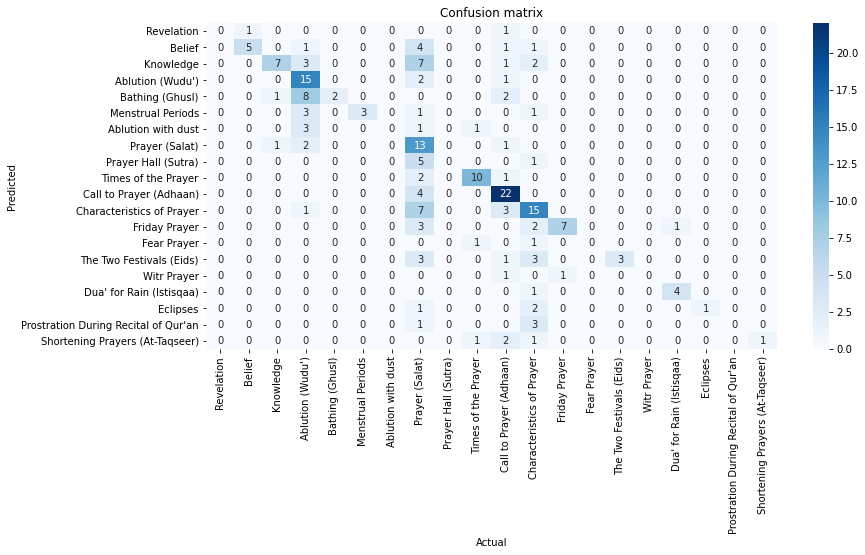

In [12]:
# CONFUSION MATRIX

aux_df = df[['Chapter', 'Label']].drop_duplicates().sort_values('Label')
conf_matrix = confusion_matrix(labels_test, mnbc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Chapter'].values, 
            yticklabels=aux_df['Chapter'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [13]:
# Create a dataset with a model summary to compare models (train&test):

d = {
     'Model': 'Multinomial Naïve Bayes',
     'Training Set Accuracy': accuracy_score(labels_train, mnbc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, mnbc_pred)
}

df_models_mnbc = pd.DataFrame(d, index=[0])
df_models_mnbc

,Model,Training Set Accuracy,Test Set Accuracy
0,Multinomial Naïve Bayes,0.662322,0.511848


In [14]:
# SAVE MODEL & DATASET

with open('best_mnbc.pickle', 'wb') as output:
    pickle.dump(mnbc, output)
    
with open('df_models_mnbc.pickle', 'wb') as output:
    pickle.dump(df_models_mnbc, output)